In [30]:
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as sts

from scipy.optimize import minimize
%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [144]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [211]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )    

In [266]:
# составляем пары схожих пользователей
for i in raitings:
    similar = np.zeros((2,15))
    similar[0] = i
    cos = 0.99
    for ii in raitings:
        if cosine(i, ii) < cos:
            similar[1] = ii
            cos = cosine(i, ii)
    print(similar)  

[[ 4.  4.  9.  4.  1.  6. 10.  7.  9.  6.  9.  2.  8.  6.  6.]
 [ 9.  8.  4.  8.  8. 10.  6.  1.  1.  2.  9.  5.  2.  7.  2.]]
[[ 9.  2.  5. 10.  7.  8. 10.  5.  6.  2.  1.  6.  8.  9.  7.]
 [ 4.  1.  6.  4.  3. 10.  4.  4.  2.  8.  7.  9.  3.  8.  3.]]
[[ 1.  6.  8.  8.  4.  9.  3.  8. 10.  5.  2.  6.  8.  1.  6.]
 [ 9.  8.  4.  8.  8. 10.  6.  1.  1.  2.  9.  5.  2.  7.  2.]]
[[ 6.  1.  9.  7.  7.  9.  2.  3.  5.  1.  6.  6.  3.  2.  7.]
 [ 3.  7.  3.  5.  7.  9.  9.  6.  2.  9.  1.  2.  8. 10.  6.]]
[[ 3.  7.  3.  5.  7.  9.  9.  6.  2.  9.  1.  2.  8. 10.  6.]
 [ 6.  1.  9.  7.  7.  9.  2.  3.  5.  1.  6.  6.  3.  2.  7.]]
[[ 8.  3.  7.  3.  8.  6.  1.  8.  8.  6.  1.  9.  4. 10.  1.]
 [ 9.  8.  4.  8.  8. 10.  6.  1.  1.  2.  9.  5.  2.  7.  2.]]
[[ 9.  8.  4.  8.  8. 10.  6.  1.  1.  2.  9.  5.  2.  7.  2.]
 [ 1.  6.  8.  8.  4.  9.  3.  8. 10.  5.  2.  6.  8.  1.  6.]]
[[ 4.  1.  6.  4.  3. 10.  4.  4.  2.  8.  7.  9.  3.  8.  3.]
 [ 1.  6.  8.  8.  4.  9.  3.  8. 10.  5.  2.  6

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

Для выборок без учителя сжатие данных может быть произведено с помощью svd-разложения

In [273]:
U, s, V = np.linalg.svd(raitings)
S = np.zeros((raitings.shape[0], raitings.shape[1]))
S[:raitings.shape[0], :raitings.shape[0]] = np.diag(s)
n_component = 5
S = S[:, :n_component]
V = V[:n_component, :]
# A = U.dot(S.dot(V))

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [7]:
from scipy.misc import derivative
def f(x):
    x1 = np.sin(x) + np.cos(2*x + 3)
    return (np.tan(x1))**2
x0 = 1
derivative(f, x0, dx=1e-6)

55.3859176464222

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [65]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [66]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [67]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

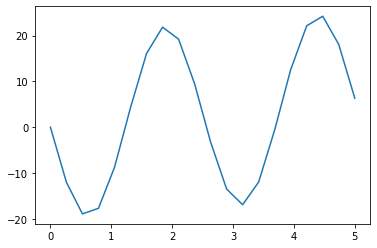

In [68]:
plt.plot(x, fx)
plt.show()

In [139]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [140]:
# подбираем начальные значения параметров (a, b) для использования метода minimize
params1 = np.array([np.full(20, -2.), np.full(20, 1.)])
res_error = minimize(error, params1, method='nelder-mead', options={'xtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000058
         Iterations: 1735
         Function evaluations: 2562


In [141]:
res_error

 final_simplex: (array([[ 2.99999977, -2.49999999, -3.51666017, ...,  1.06804677,
         1.01105254,  1.25850724],
       [ 3.00000022, -2.49999997, -3.51666031, ...,  1.06804672,
         1.01105247,  1.25850734],
       [ 2.99999976, -2.49999998, -3.5166597 , ...,  1.06804686,
         1.01105252,  1.25850723],
       ...,
       [ 2.99999953, -2.49999998, -3.51665998, ...,  1.06804673,
         1.01105263,  1.25850716],
       [ 2.99999953, -2.49999999, -3.51666059, ...,  1.06804677,
         1.01105246,  1.25850723],
       [ 2.9999996 , -2.50000008, -3.5166598 , ...,  1.06804669,
         1.01105253,  1.2585072 ]]), array([5.77686626e-05, 5.79638334e-05, 5.87145590e-05, 5.87436285e-05,
       5.90236185e-05, 5.93111692e-05, 5.98895803e-05, 6.04240904e-05,
       6.04253971e-05, 6.10076526e-05, 6.15026133e-05, 6.16134175e-05,
       6.16308563e-05, 6.16427190e-05, 6.18193682e-05, 6.19502486e-05,
       6.21210991e-05, 6.21531667e-05, 6.24277413e-05, 6.28371535e-05,
       6.32492

In [ ]:
# к сожалению не поняла, как найти найденные оптимизатором значени a и b (параметры)

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [35]:
# создадим дискретную случайную велечину рэндомно
elements = np.random.random(20)

In [37]:
# создадим рэндомно плотности вероятностей значений с.в.
list_of_random_floats = np.random.random(20) 
probabilities = list_of_random_floats / list_of_random_floats.sum()

In [38]:
sum(probabilities)

1.0

In [39]:
elements, probabilities

(array([0.40086821, 0.31398391, 0.32985631, 0.07886394, 0.38597968,
        0.14138947, 0.42993347, 0.35035734, 0.89390487, 0.29226313,
        0.08088234, 0.0987532 , 0.93867541, 0.15073502, 0.88766538,
        0.73209997, 0.33938062, 0.08438013, 0.66313335, 0.18730013]),
 array([0.04963899, 0.05887548, 0.07349523, 0.03682579, 0.0566693 ,
        0.03418932, 0.06348284, 0.05495484, 0.02471468, 0.06085307,
        0.07438556, 0.05776901, 0.03066203, 0.00676592, 0.0583641 ,
        0.03745197, 0.05470363, 0.06252484, 0.06217236, 0.04150105]))

In [40]:
#параметры запуска: размеры выборок и количество повторов генерации
n1 = 50
samples_count = 1000

#массив для сохранения средних по выборкам
a1 = np.array([])

for number in range(samples_count):
    # на каждом цикле генерируем выборки размера n1
    sample1 = np.random.choice(elements, n1, p=probabilities)
    # считаем среднее по каждой выборке и добавляем в массив средних
    a1 = np.append(a1, sample1.mean())

In [48]:
len(a1)

1000

Text(0.5, 0, '$x$')

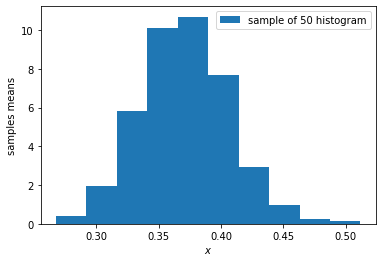

In [43]:
#строим график
label_1 = 'sample of ' + str(n1) + ' histogram'
plt.hist(a1, density=True, label=label_1)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')

При большом количестве повторений эксперимента распределение средних значений выборок является нормальным.

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [14]:
a = np.array([[1, 4], [1, 1]])
w, v = np.linalg.eig(a)

In [16]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [ 0.89442719 -0.89442719]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [0.4472136 0.4472136]
